In [253]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [254]:
drive.mount('/content/MyDrive')
PATH_BASE = '/content/MyDrive/MyDrive/Datasets/'

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [255]:
# Define the column names 
cols = ['id', 'created_at', 'updated_at', 'deleted_at','birth_date', 'status','version', 'city', 
        'state', 'neighborhood', 'last_date_purchase', 'average_ticket', 'items_quantity', 'all_revenue', 
        'all_orders', 'recency','marketing_source']

# Define the column names to convert to date
date_cols = ['created_at', 'updated_at', 'deleted_at', 'birth_date', 'last_date_purchase']

# Read the CSV file and convert specified columns to datetime
churn_df = pd.read_csv(PATH_BASE + "data-test-analytics.csv", usecols = cols, parse_dates = date_cols)

#Cleaning data

In [256]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   birth_date          10000 non-null  datetime64[ns]
 5   status              10000 non-null  object        
 6   version             10000 non-null  object        
 7   city                10000 non-null  object        
 8   state               10000 non-null  object        
 9   neighborhood        10000 non-null  object        
 10  last_date_purchase  10000 non-null  datetime64[ns]
 11  average_ticket      10000 non-null  float64       
 12  items_quantity      10000 non-null  int64         
 13  all_revenue         10000 non-null  float64    

In [257]:
# Check data types
churn_df.dtypes

id                            object
created_at            datetime64[ns]
updated_at            datetime64[ns]
deleted_at            datetime64[ns]
birth_date            datetime64[ns]
status                        object
version                       object
city                          object
state                         object
neighborhood                  object
last_date_purchase    datetime64[ns]
average_ticket               float64
items_quantity                 int64
all_revenue                  float64
all_orders                     int64
recency                        int64
marketing_source              object
dtype: object

In [258]:
# Check if there are null values
churn_df.isna().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

Data out of range

In [259]:
from datetime import date

# Check for out of range values in datetime columns
date_cols = churn_df.select_dtypes(include=['datetime64']).columns
for col in date_cols:
    num_out_of_range = len(churn_df[churn_df[col].dt.date > date.today()])
    print(f"Number of '{col}' rows out of range: {num_out_of_range}")

# Check for negative values in numeric columns
num_cols = churn_df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    num_negative = len(churn_df[churn_df[col] < 0])
    print(f"Number of '{col}' rows out of range: {num_negative}")

Number of 'created_at' rows out of range: 0
Number of 'updated_at' rows out of range: 0
Number of 'deleted_at' rows out of range: 0
Number of 'birth_date' rows out of range: 5849
Number of 'last_date_purchase' rows out of range: 0
Number of 'average_ticket' rows out of range: 0
Number of 'items_quantity' rows out of range: 0
Number of 'all_revenue' rows out of range: 0
Number of 'all_orders' rows out of range: 0
Number of 'recency' rows out of range: 0


In [260]:
# Drop 'birth_date' column
churn_df.drop('birth_date', axis = 1, inplace = True)

Duplicated data

In [261]:
# Drop duplicates across all columns
churn_df.drop_duplicates(inplace = True)

# Drop duplicated rows that have the same id
churn_df.drop_duplicates('id', inplace = True)

# Clients created at the same time
churn_df[churn_df.duplicated(subset = ['created_at'], keep = False)].sort_values('created_at')

,id,created_at,updated_at,deleted_at,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
6254,61422392-131d-40e9-87df-33456b4eeac2,2016-02-28 19:47:00,2021-01-23 11:23:00,NaT,active,4.8.10,da Rosa,TO,Salgado Filho,2021-01-23 11:23:00,203.280044,5,2236.080484,11,26,paid_search
1547,b034824f-1802-44d7-9d8b-a436aa9cea6e,2016-02-28 19:47:00,2021-01-08 11:23:00,NaT,active,4.16.10,Cavalcanti da Serra,MG,Vitoria Da Conquista,2021-01-08 11:23:00,174.783567,9,1922.619237,11,41,organic_search
2435,814030bf-0880-453e-b2c8-6364083ced2e,2016-05-07 02:55:00,2021-01-12 11:23:00,NaT,active,2.14.3,Teixeira,AL,Mirtes,2021-01-12 11:23:00,224.664451,4,2021.980060,9,37,telegram_whatsapp
1052,b5d59cbc-5fab-41b4-9627-a9fce3647317,2016-05-07 02:55:00,2021-01-17 11:23:00,NaT,active,5.40.6,da Cruz,RJ,Vila De Sá,2021-01-17 11:23:00,208.142382,10,1873.281442,9,32,direct
9819,2d61bf9c-5309-48e1-a801-c08735508cee,2016-06-26 06:47:00,2021-01-06 11:23:00,NaT,active,3.33.5,Gonçalves,PE,Vila Maloca,2021-01-06 11:23:00,217.157640,11,1520.103481,7,43,none
8613,ee6550a2-b9ac-4496-9d4c-0871f380f4a6,2016-06-26 06:47:00,2021-01-24 11:23:00,NaT,active,3.26.14,Pinto Verde,AM,Ipiranga,2021-01-24 11:23:00,226.951651,6,1588.661554,7,25,direct
29,f1a447fc-d9f7-4d7f-81f9-29ad2828e8d8,2016-11-06 20:45:00,2021-01-10 11:23:00,NaT,active,3.22.10,Novaes,MT,Cenaculo,2021-01-10 11:23:00,203.883422,5,611.650267,3,39,organic_search
1102,09ef39d4-fc62-4672-b017-989cfa2378cf,2016-11-06 20:45:00,2021-01-16 11:23:00,NaT,active,3.34.10,das Neves de Monteiro,PI,Vale Do Jatoba,2021-01-16 11:23:00,161.213244,9,483.639731,3,33,direct
363,c629b9a7-b0a5-4200-821e-5181b0708e77,2017-02-11 17:18:00,2021-01-06 11:23:00,NaT,active,4.7.8,Moreira de Ramos,DF,Graça,2021-01-06 11:23:00,185.323127,10,0.000000,0,43,organic_search
572,8393c66d-3f5c-473b-98c1-afdc9b9838e3,2017-02-11 17:18:00,2021-01-03 11:23:00,NaT,active,5.11.4,Pereira,MA,Marilandia,2021-01-03 11:23:00,167.994806,12,0.000000,0,46,paid_search


In [262]:
churn_df.columns

Index(['id', 'created_at', 'updated_at', 'deleted_at', 'status', 'version',
       'city', 'state', 'neighborhood', 'last_date_purchase', 'average_ticket',
       'items_quantity', 'all_revenue', 'all_orders', 'recency',
       'marketing_source'],
      dtype='object')

Check inconsistency

In [263]:
# Define a mask to filter the rows based on the following conditions:
# 1. 'created_at' should be less than or equal to 'updated_at'
# 2. 'created_at' should be less than or equal to 'deleted_at'
# 3. 'created_at' should be less than or equal to 'last_date_purchase'
# 4. 'last_date_purchase' should be less than or equal to 'deleted_at' (if it exists)
#    Otherwise, it should be less than or equal to the current date and time

mask = (churn_df['created_at'] <= churn_df['updated_at']) & \
        (churn_df['created_at'] <= churn_df['deleted_at'].fillna(pd.Timestamp.now())) & \
        (churn_df['last_date_purchase'] <= churn_df['deleted_at'].fillna(pd.Timestamp.now())) & \
        (churn_df['created_at'] <= churn_df['last_date_purchase'])

# Filter the churn data using the mask and update the churn data with the filtered data
consistent = churn_df[mask]
inconcistent = churn_df[~mask]

In [264]:
len(inconcistent), len(consistent)

(177, 9823)

In [265]:
# Check the status values to see if it is possible to drop inconsistent values
inconcistent['status'].value_counts()

active    154
paused     23
Name: status, dtype: int64

In [266]:
churn_df = consistent

Cross-validation

In [267]:
# Check if avarage ticket times all_orders is equal to all_revenue
# Take precision when multiplicating floats into account
tolerance = 0.1
mask = abs(churn_df['average_ticket'] * churn_df['all_orders'] - churn_df['all_revenue']) < tolerance
churn_df = churn_df[mask]

In [268]:
# Select rows where 'deleted_at' column is not null
deleted_churn = churn_df[~pd.isna(churn_df['deleted_at'])]

# Select rows where 'status' column is 'canceled'
canceled_churn = churn_df[churn_df['status'] == 'canceled']

# Check if all canceled subscriptions have 'deleted_at' values
result = (deleted_churn == canceled_churn).isna().any().sum() == 0

if result:
  print("All canceled subscriptions have 'deleted_at' values")

All canceled subscriptions have 'deleted_at' values


In [269]:
# Create a new column that shows the time since the last purchase in the subscription
churn_df['recency_subscription'] = (churn_df['last_date_purchase'].max() - churn_df['last_date_purchase']).dt.days


# For clients who have a value in the 'deleted_at' column, calculate the difference
# between the 'deleted_at' and 'last_date_purchase' columns and use that value to
# create a coolumn 'recency_subscription'.
churn_df.loc[churn_df['deleted_at'].notnull(), 'recency_subscription'] = \
          (churn_df['deleted_at'] - churn_df['last_date_purchase']).dt.days

In [270]:
churn_df['recency_subscription']

0       33
1       39
2       40
3       37
4       29
        ..
9995    16
9996    29
9997    44
9998    38
9999    31
Name: recency_subscription, Length: 9823, dtype: int64

#Exploratory Data Analysis

In [271]:
churn_df.sort_values(by = 'created_at', inplace = True)

In [272]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 7189 to 3085
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9823 non-null   object        
 1   created_at            9823 non-null   datetime64[ns]
 2   updated_at            9823 non-null   datetime64[ns]
 3   deleted_at            505 non-null    datetime64[ns]
 4   status                9823 non-null   object        
 5   version               9823 non-null   object        
 6   city                  9823 non-null   object        
 7   state                 9823 non-null   object        
 8   neighborhood          9823 non-null   object        
 9   last_date_purchase    9823 non-null   datetime64[ns]
 10  average_ticket        9823 non-null   float64       
 11  items_quantity        9823 non-null   int64         
 12  all_revenue           9823 non-null   float64       
 13  all_orders     

In [273]:
churn_df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,recency_subscription
count,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000
mean,216.954562,8.498218,1195.752641,5.511555,67.759748,43.042248
std,22.752313,3.028873,753.805994,3.412705,177.246663,77.103349
min,131.378672,1.000000,0.000000,0.000000,1.000000,0.000000
25%,201.463054,6.000000,562.457066,3.000000,31.000000,28.000000
50%,217.064719,8.000000,1192.673261,6.000000,35.000000,33.000000
75%,232.509877,11.000000,1809.591401,8.000000,39.000000,37.000000
max,303.386848,19.000000,3225.654163,11.000000,1820.000000,1516.000000


In [274]:
# Set color palette
colors = ["#DE8F8F", "#8FB8DE"]
sns.set_palette(sns.color_palette(colors))

#set context
sns.set_context("notebook")

Create a new churn column and look at some descriptive statistics

In [275]:
# Create a new column to address churned clients
churn_df['churn'] = pd.isna(churn_df['deleted_at']).apply(lambda deleted: "Yes" if not deleted else "No")

In [276]:
churn_df.groupby('churn').mean(numeric_only = True)

,average_ticket,items_quantity,all_revenue,all_orders,recency,recency_subscription
churn,,,,,,
No,216.928334,8.490127,1203.142122,5.547006,34.526079,32.526079
Yes,217.438501,8.647525,1059.405752,4.857426,680.970297,237.081188


In [277]:
churn_df.groupby('churn').std(numeric_only = True)

,average_ticket,items_quantity,all_revenue,all_orders,recency,recency_subscription
churn,,,,,,
No,22.766637,3.032941,752.011937,3.405432,6.052941,6.052941
Yes,22.503191,2.951748,774.373741,3.483446,463.006656,274.604418


Define new categories to describe recency

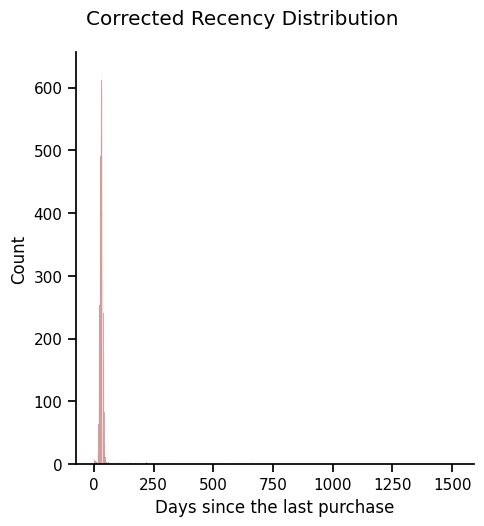

In [278]:
# Create catplot
g = sns.displot(x = 'recency_subscription', data = churn_df)

# Set labels and title
g.set_xlabels('Days since the last purchase')
g.set_ylabels('Count')
g.fig.suptitle('Corrected Recency Distribution', y = 1.05)

plt.show()

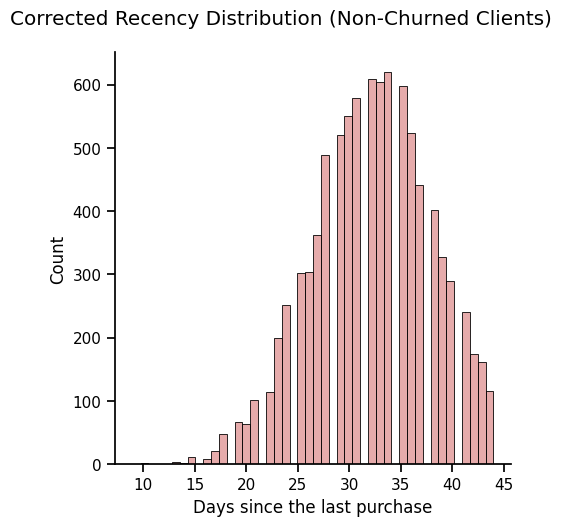

In [279]:
# Subset the data
subsetted_churn_df = churn_df[(churn_df['churn'] == "No") & 
                              (churn_df['recency_subscription'] < churn_df['recency_subscription'].quantile(0.95))]

# Create displot
g = sns.displot(x='recency_subscription', data=subsetted_churn_df)

# Set labels and title
g.set(xlabel='Days since the last purchase', ylabel='Count')
g.fig.suptitle('Corrected Recency Distribution (Non-Churned Clients)', y=1.05)

# Show the plot
plt.show()

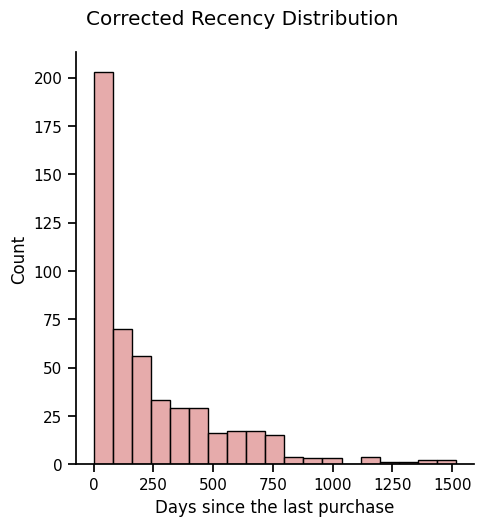

In [280]:
# Subset the data to only include churned clients
subsetted_churn_df = churn_df[(churn_df['churn'] == "Yes")]

# Create a distribution plot with seaborn
g = sns.displot(x='recency_subscription', data=subsetted_churn_df)

# Set the labels for the x and y axis
g.set(xlabel='Days since the last purchase', ylabel='Count')

# Set the title and adjust its position
g.fig.suptitle('Corrected Recency Distribution', y=1.05)

# Show plot
plt.show()

In [281]:
# Define quantiles and bins
quantile_25th = churn_df['recency_subscription'].quantile(0.25)
quantile_75th = churn_df['recency_subscription'].quantile(0.75)
bins = [-1, quantile_25th, quantile_75th, churn_df['recency_subscription'].max()]

# Define labels for each category
labels = ['0-28 days', '29-37 days', '38+ days']

# Create a new column with the recency category
churn_df['recency_category'] = pd.cut(churn_df['recency_subscription'], bins=bins, labels=labels)

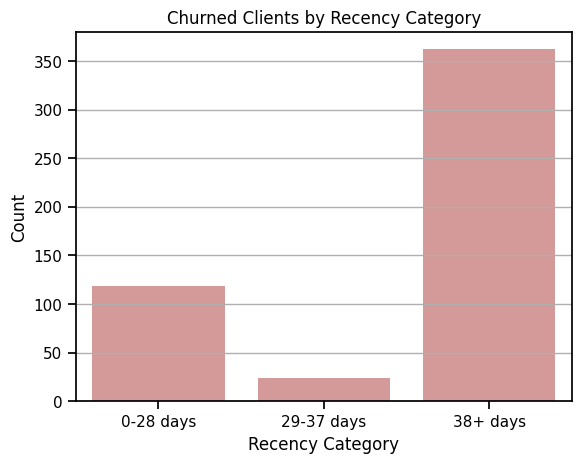

In [282]:
# Select only the churned clients
churned_clients = churn_df[churn_df['churn'] == 'Yes']

# Create a countplot with Seaborn
sns.countplot(x='recency_category', data=churned_clients, color='#DE8F8F')

# Set the title and x-axis label
plt.title('Churned Clients by Recency Category')
plt.xlabel('Recency Category')
plt.ylabel('Count')

# Add horizontal grid lines
plt.grid(axis='y')

# Show the plot
plt.show()

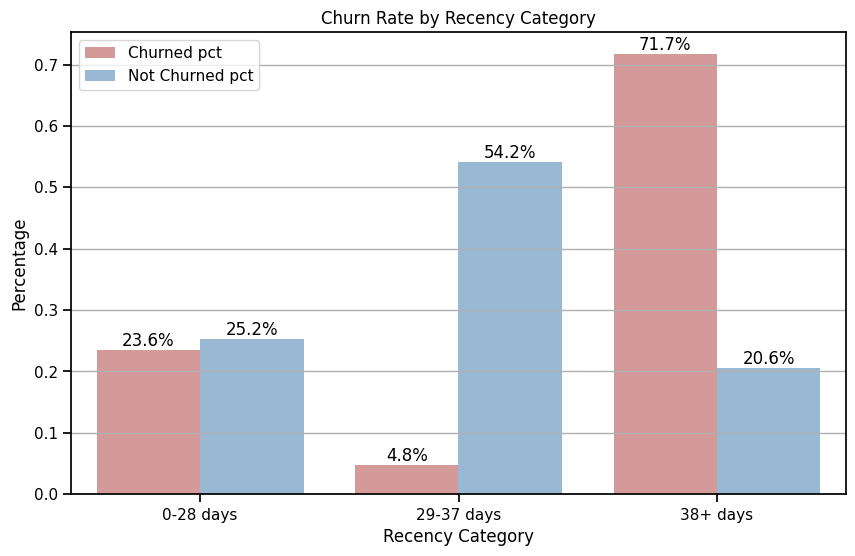

In [283]:
# Filter the DataFrame to include only churned and non-churned clients
churned_df = churn_df[churn_df['churn'] == 'Yes']
not_churned_df = churn_df[churn_df['churn'] == 'No']

# Group the data by recency_category and calculate the percentage of churned and non-churned clients in each group
churned_pct = churned_df.groupby('recency_category')['churn'].count() / len(churned_df)
not_churned_pct = not_churned_df.groupby('recency_category')['churn'].count() / len(not_churned_df)

# Merge the percentages for churned and non-churned clients into a single DataFrame
pct_df = pd.concat([churned_pct, not_churned_pct], axis=1).reset_index()
pct_df.columns = ['recency_category', 'Churned pct', 'Not Churned pct']

# Melt the DataFrame to create a "long" format for Seaborn's bar plot
melted_df = pct_df.melt(id_vars='recency_category', var_name='churned', value_name='percent')


# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='recency_category', y='percent', hue='churned', data=melted_df)

# Add horizontal grid lines
plt.grid(axis='y')

# Add percentage annotations to the bars
for p in ax.containers:
    for q in p.patches:
        x = q.get_x() + q.get_width() / 2
        y = q.get_height()
        ax.annotate('{:.1%}'.format(y), (x, y), ha='center', va='bottom')

# Set the x and y labels
ax.set_xlabel('Recency Category')
ax.set_ylabel('Percentage')

# Set the title
ax.set_title('Churn Rate by Recency Category')

legend = ax.get_legend()
legend.set_title("")

# Show plot
plt.show()

Define new column 'subscription length' to see the relatioship between churned clients

In [284]:
# Define a date and time.
current_time = churn_df['last_date_purchase'].max()

# Fill any missing values (if any) in the 'deleted_at' column with the defined time
deleted_at = churn_df['deleted_at'].fillna(current_time)

# Calculate the difference between the 'deleted_at' and 'created_at' columns to get the subscription duration 
subscription_duration = deleted_at - churn_df['created_at']

# Extract only the days from the subscription duration
subscription_days = subscription_duration.dt.days

# Create a new column 'subscription_length'
churn_df['subscription_length'] = subscription_days

In [285]:
churn_df.groupby('churn')['subscription_length'].mean()

churn
No     936.570187
Yes    471.700990
Name: subscription_length, dtype: float64

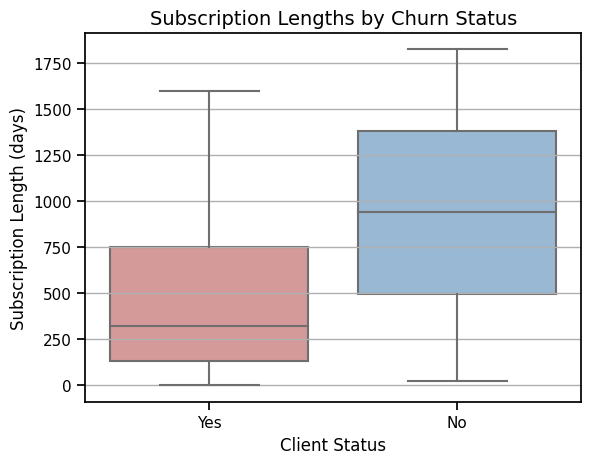

In [286]:
# Create boxplot
g = sns.boxplot(x = 'churn', y = 'subscription_length', sym = "", data = churn_df)

# Add horizontal grid
g.yaxis.grid(True)

# Set labels and title
g.set_xlabel('Client Status')
g.set_ylabel('Subscription Length (days)')
g.set_title("Subscription Lengths by Churn Status", fontsize = 14)

# Add descriptive note to x-axis
g.set(xticklabels=["Yes", "No"])

# Show plot
plt.show()

In [287]:
# Define quantiles and bins
quantile_25th = churn_df['subscription_length'].quantile(0.25)
median = churn_df['subscription_length'].median()
quantile_75th = churn_df['subscription_length'].quantile(0.75)
bins = [-1, quantile_25th, median, quantile_75th, churn_df['subscription_length'].max()]

# Define labels for each category
labels = ['0-460 days', '461-900 days', '901-1360 days', '1361+ days']

# Create a new column with the recency category
churn_df['subscription_category'] = pd.cut(churn_df['subscription_length'], bins=bins, labels=labels)

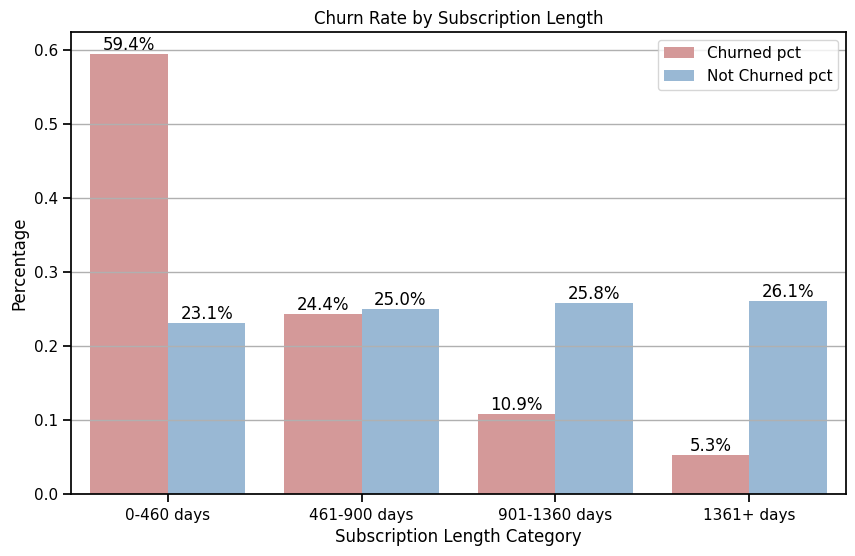

In [288]:
# Filter the DataFrame to include only churned and non-churned clients
churned_df = churn_df[churn_df['churn'] == 'Yes']
not_churned_df = churn_df[churn_df['churn'] == 'No']

# Group the data by subscription_category and calculate the percentage of churned and non-churned clients in each group
churned_pct = churned_df.groupby('subscription_category')['churn'].count() / len(churned_df)
not_churned_pct = not_churned_df.groupby('subscription_category')['churn'].count() / len(not_churned_df)

# Merge the percentages for churned and non-churned clients into a single DataFrame
pct_df = pd.concat([churned_pct, not_churned_pct], axis=1).reset_index()
pct_df.columns = ['subscription_category', 'Churned pct', 'Not Churned pct']

# Melt the DataFrame to create a "long" format for Seaborn's bar plot
melted_df = pct_df.melt(id_vars='subscription_category', var_name='churned', value_name='percent')


# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='subscription_category', y='percent', hue='churned', data=melted_df)

# Add horizontal grid lines
plt.grid(axis='y')

# Add percentage annotations to the bars
for p in ax.containers:
    for q in p.patches:
        x = q.get_x() + q.get_width() / 2
        y = q.get_height()
        ax.annotate('{:.1%}'.format(y), (x, y), ha='center', va='bottom')

# Set the x and y labels
ax.set_xlabel('Subscription Length Category')
ax.set_ylabel('Percentage')

# Set the title
ax.set_title('Churn Rate by Subscription Length')

legend = ax.get_legend()
legend.set_title("")

# Show plot
plt.show()

Analyze the version column

In [289]:
# Modify version column. Get only the first digit
churn_df['version'] = churn_df['version'].apply(lambda version: version[0])

# select only the rows where there are churned clientes
churned_df = churn_df[churn_df['churn'] == 'Yes']

# count the number of occurrences of each version among the customers who churned and sort the results
churned_versions = churned_df['version'].value_counts().sort_index()

# count the number of occurrences of each version in the entire dataset and sort the results
all_versions = churn_df['version'].value_counts().sort_index()

# calculate the ratio of each version among the customers who churned relative to the total customers
version_churn_ratio = churned_versions / all_versions

# print the ratio of each version among the customers who churned
print(version_churn_ratio)

0    0.090909
1    0.065000
2    0.064467
3    0.049002
4    0.049185
5    0.045622
6    0.065116
7    0.076923
Name: version, dtype: float64


Analyze the state and city columns

In [290]:
churn_df['state'].value_counts()

GO    397
TO    396
RR    389
PR    379
RO    376
RJ    372
RS    372
AP    371
CE    371
AM    369
MG    368
MT    367
MS    366
PE    366
SC    365
PB    363
SE    361
BA    360
AC    356
MA    353
DF    351
SP    350
RN    348
ES    345
AL    343
PA    340
PI    329
Name: state, dtype: int64

In [291]:
# select only the rows where the value in the 'churn' column is 'Yes'
churned_df = churn_df[churn_df['churn'] == 'Yes']

# count the number of occurrences of each state among the customers who churned
churned_states = churned_df['state'].value_counts().sort_index()

# count the number of occurrences of each state in the entire dataset
all_states = churn_df['state'].value_counts().sort_index()

# calculate the ratio of each state among the customers who churned
state_churn_ratio = churned_states / all_states

# print the ratio of each software version among the customers who churned
print(state_churn_ratio)

AC    0.044944
AL    0.064140
AM    0.062331
AP    0.040431
BA    0.055556
CE    0.051213
DF    0.042735
ES    0.034783
GO    0.052897
MA    0.065156
MG    0.051630
MS    0.054645
MT    0.065395
PA    0.064706
PB    0.038567
PE    0.054645
PI    0.033435
PR    0.044855
RJ    0.043011
RN    0.043103
RO    0.045213
RR    0.059126
RS    0.067204
SC    0.032877
SE    0.066482
SP    0.045714
TO    0.060606
Name: state, dtype: float64


In [292]:
churn_df['city'].value_counts()[:20]

 Cardoso       158
 Rocha          89
 Farias         85
 Ribeiro        83
 da Mota        81
 Monteiro       81
 Silveira       80
 Nascimento     80
 Silva          80
 Aragão         78
 Lopes          78
 Nunes          77
 Gonçalves      77
 Novaes         77
 Dias           77
 Campos         76
 Correia        76
 Costa          76
 Teixeira       76
 Melo           76
Name: city, dtype: int64

In [293]:
churn_df[churn_df['churn'] == 'Yes'].groupby('city')['churn'].count().sort_values(ascending = False)[:20]

city
 Ribeiro      9
 das Neves    7
 Rocha        7
 Moraes       7
 Monteiro     7
 Porto        7
 da Costa     6
 da Cunha     6
 da Rosa      6
 Jesus        6
 Teixeira     5
 Caldeira     5
 da Mata      5
 Sales        5
 Cardoso      5
 Gonçalves    5
 Martins      5
 Nogueira     5
 Dias         4
 Rezende      4
Name: churn, dtype: int64

Analyze the status colum

In [294]:
churn_df['status'].value_counts()

active      8370
paused       948
canceled     505
Name: status, dtype: int64

Analyze Market source

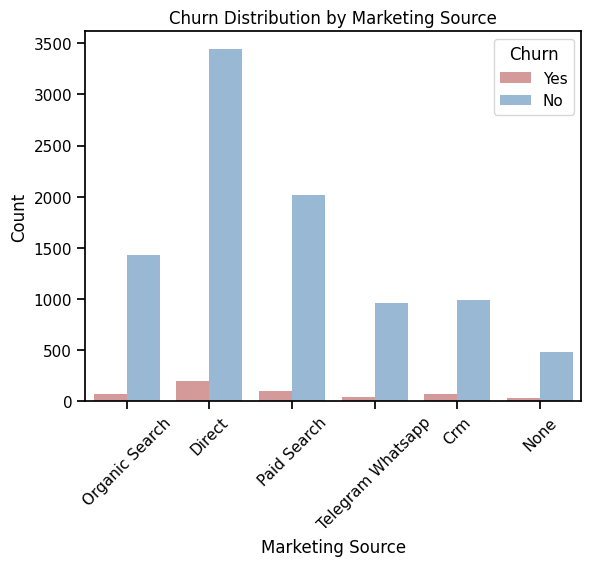

In [295]:
# Create countplot with hue
ax = sns.countplot(x='marketing_source', data=churn_df, hue='churn')

# Set tick labels and rotate
ax.set_xticklabels(['Organic Search', 'Direct', 'Paid Search', 'Telegram Whatsapp', 'Crm', 'None'], rotation=45)

# Set labels and title
ax.set(xlabel='Marketing Source', ylabel='Count')
plt.title('Churn Distribution by Marketing Source')

legend = ax.get_legend()
legend.set_title("Churn")

# Show plot
plt.show()

In [296]:
churn_df['marketing_source'].value_counts()

organic_search       3641
direct               2114
paid_search          1497
telegram_whatsapp    1050
crm                  1004
none                  517
Name: marketing_source, dtype: int64

Relationship between when the subscription was signed and churned clients

In [297]:
# Create a year column for each customer
churn_df['created_year'] = churn_df['created_at'].dt.year

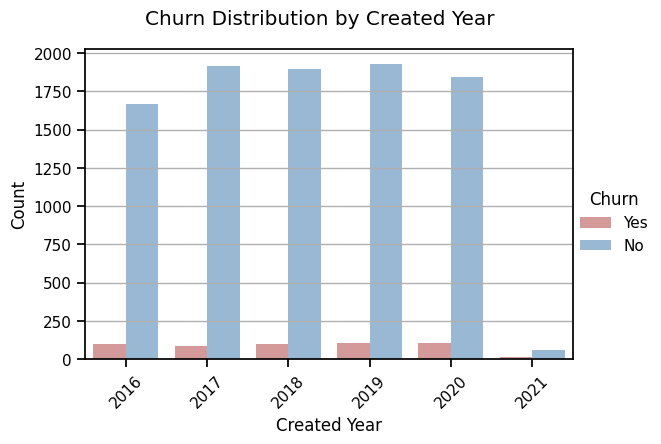

In [298]:
# Create catplot
g = sns.catplot(x = 'created_year', kind = 'count', data = churn_df, hue = 'churn', height= 4, aspect = 1.5)

# Set labels and title
g.set_xlabels('Created Year')
g.set_ylabels('Count')
g.fig.suptitle('Churn Distribution by Created Year', y = 1.05)

# Add horizontal grid
g.ax.yaxis.grid(True)

# Rotate ticks
g.set_xticklabels(rotation = 45)
g._legend.set_title('Churn')

# Add spines
sns.despine(ax = g.ax, top = False, right = False)

plt.show()

Heatmap to show the correlation

<ipython-input-299-e1930ace83aa>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_churn.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.5, ax=ax)


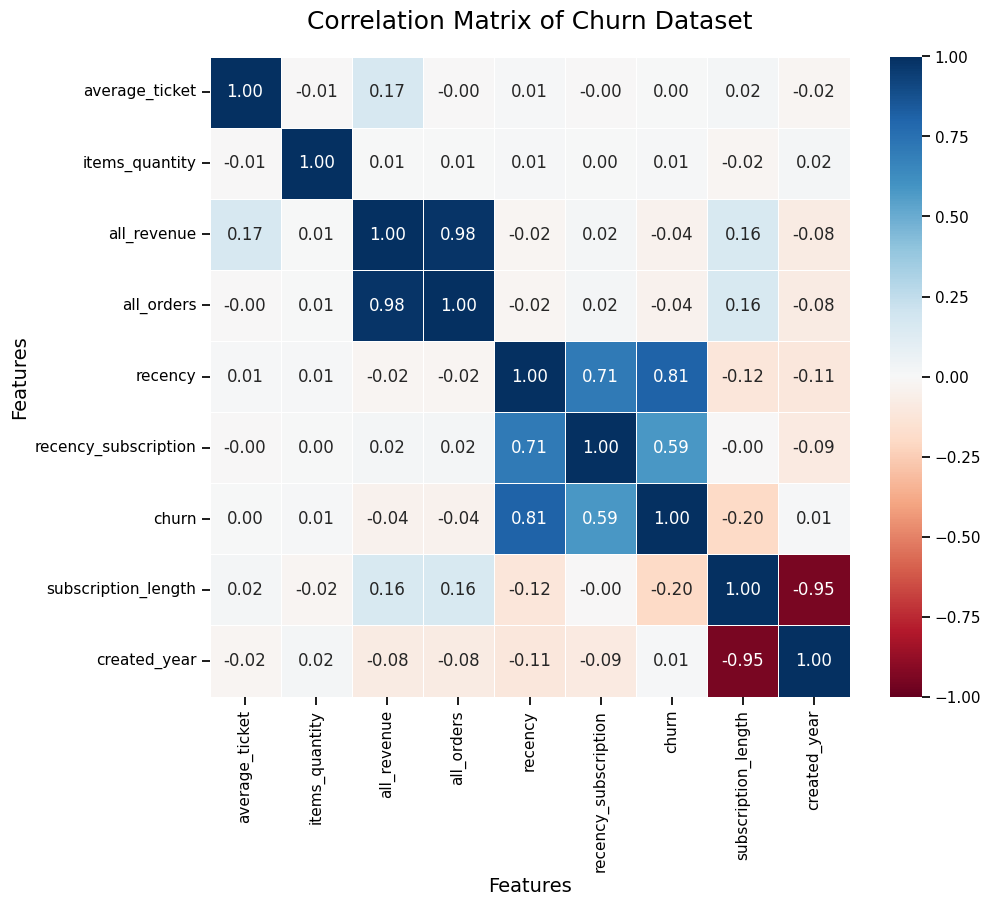

In [299]:
# Convert churn values to binary
corr_churn = churn_df.copy()
corr_churn['churn'] = corr_churn['churn'].apply(lambda value: 1 if value == 'Yes' else 0)

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_churn.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True, fmt='.2f', linewidths=.5, ax=ax)

# Set title and adjust layout
ax.set_title('Correlation Matrix of Churn Dataset', fontsize=18, pad=20)
plt.subplots_adjust(top=0.95, bottom=0.15, left=0.15, right=0.95)

# Set labels
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Show plot
plt.show()